## Solar Abundances

Figure 1.4 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of solar abundace vs. atomic number.  Data are from Lodders 2020, Solar Elemental Abundances, in The Oxford Research Encyclopedia of Planetary Science, Oxford University Press. doi:[10.1093/acrefore/9780190647926.013.145](https://doi.org/10.1093/acrefore/9780190647926.013.145), Table 8


In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [2]:
plotFile = 'Fig1_4.png' 

# graphic aspect ratio = width/height

aspect = 2.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Abundance Data

Source data in file `Lodders2020.txt` which has 5 columns: atomic number (Z), element name, and log10 of the
abundance normalized to N(H)=10$^{12}$ hydrogen atoms and its error for the present-day and proto-Sun.

We plot the proto (4.567 Gya) data.

The table has gaps for short-lived radioactive elements not measured in the solar system, so we use
a numpy masked array for the plot.

In [3]:
dataFile = 'Lodders2020.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
atomic = np.array(data['Z'])
proto = np.array(data['proto'])

abund = np.ma.masked_where(proto==-999, proto) # mind gaps

### Figure 1.4

Plot abundance vs. atomic number, label the 10 most abundance elements (all of which have 12+log(N/H)>7).  

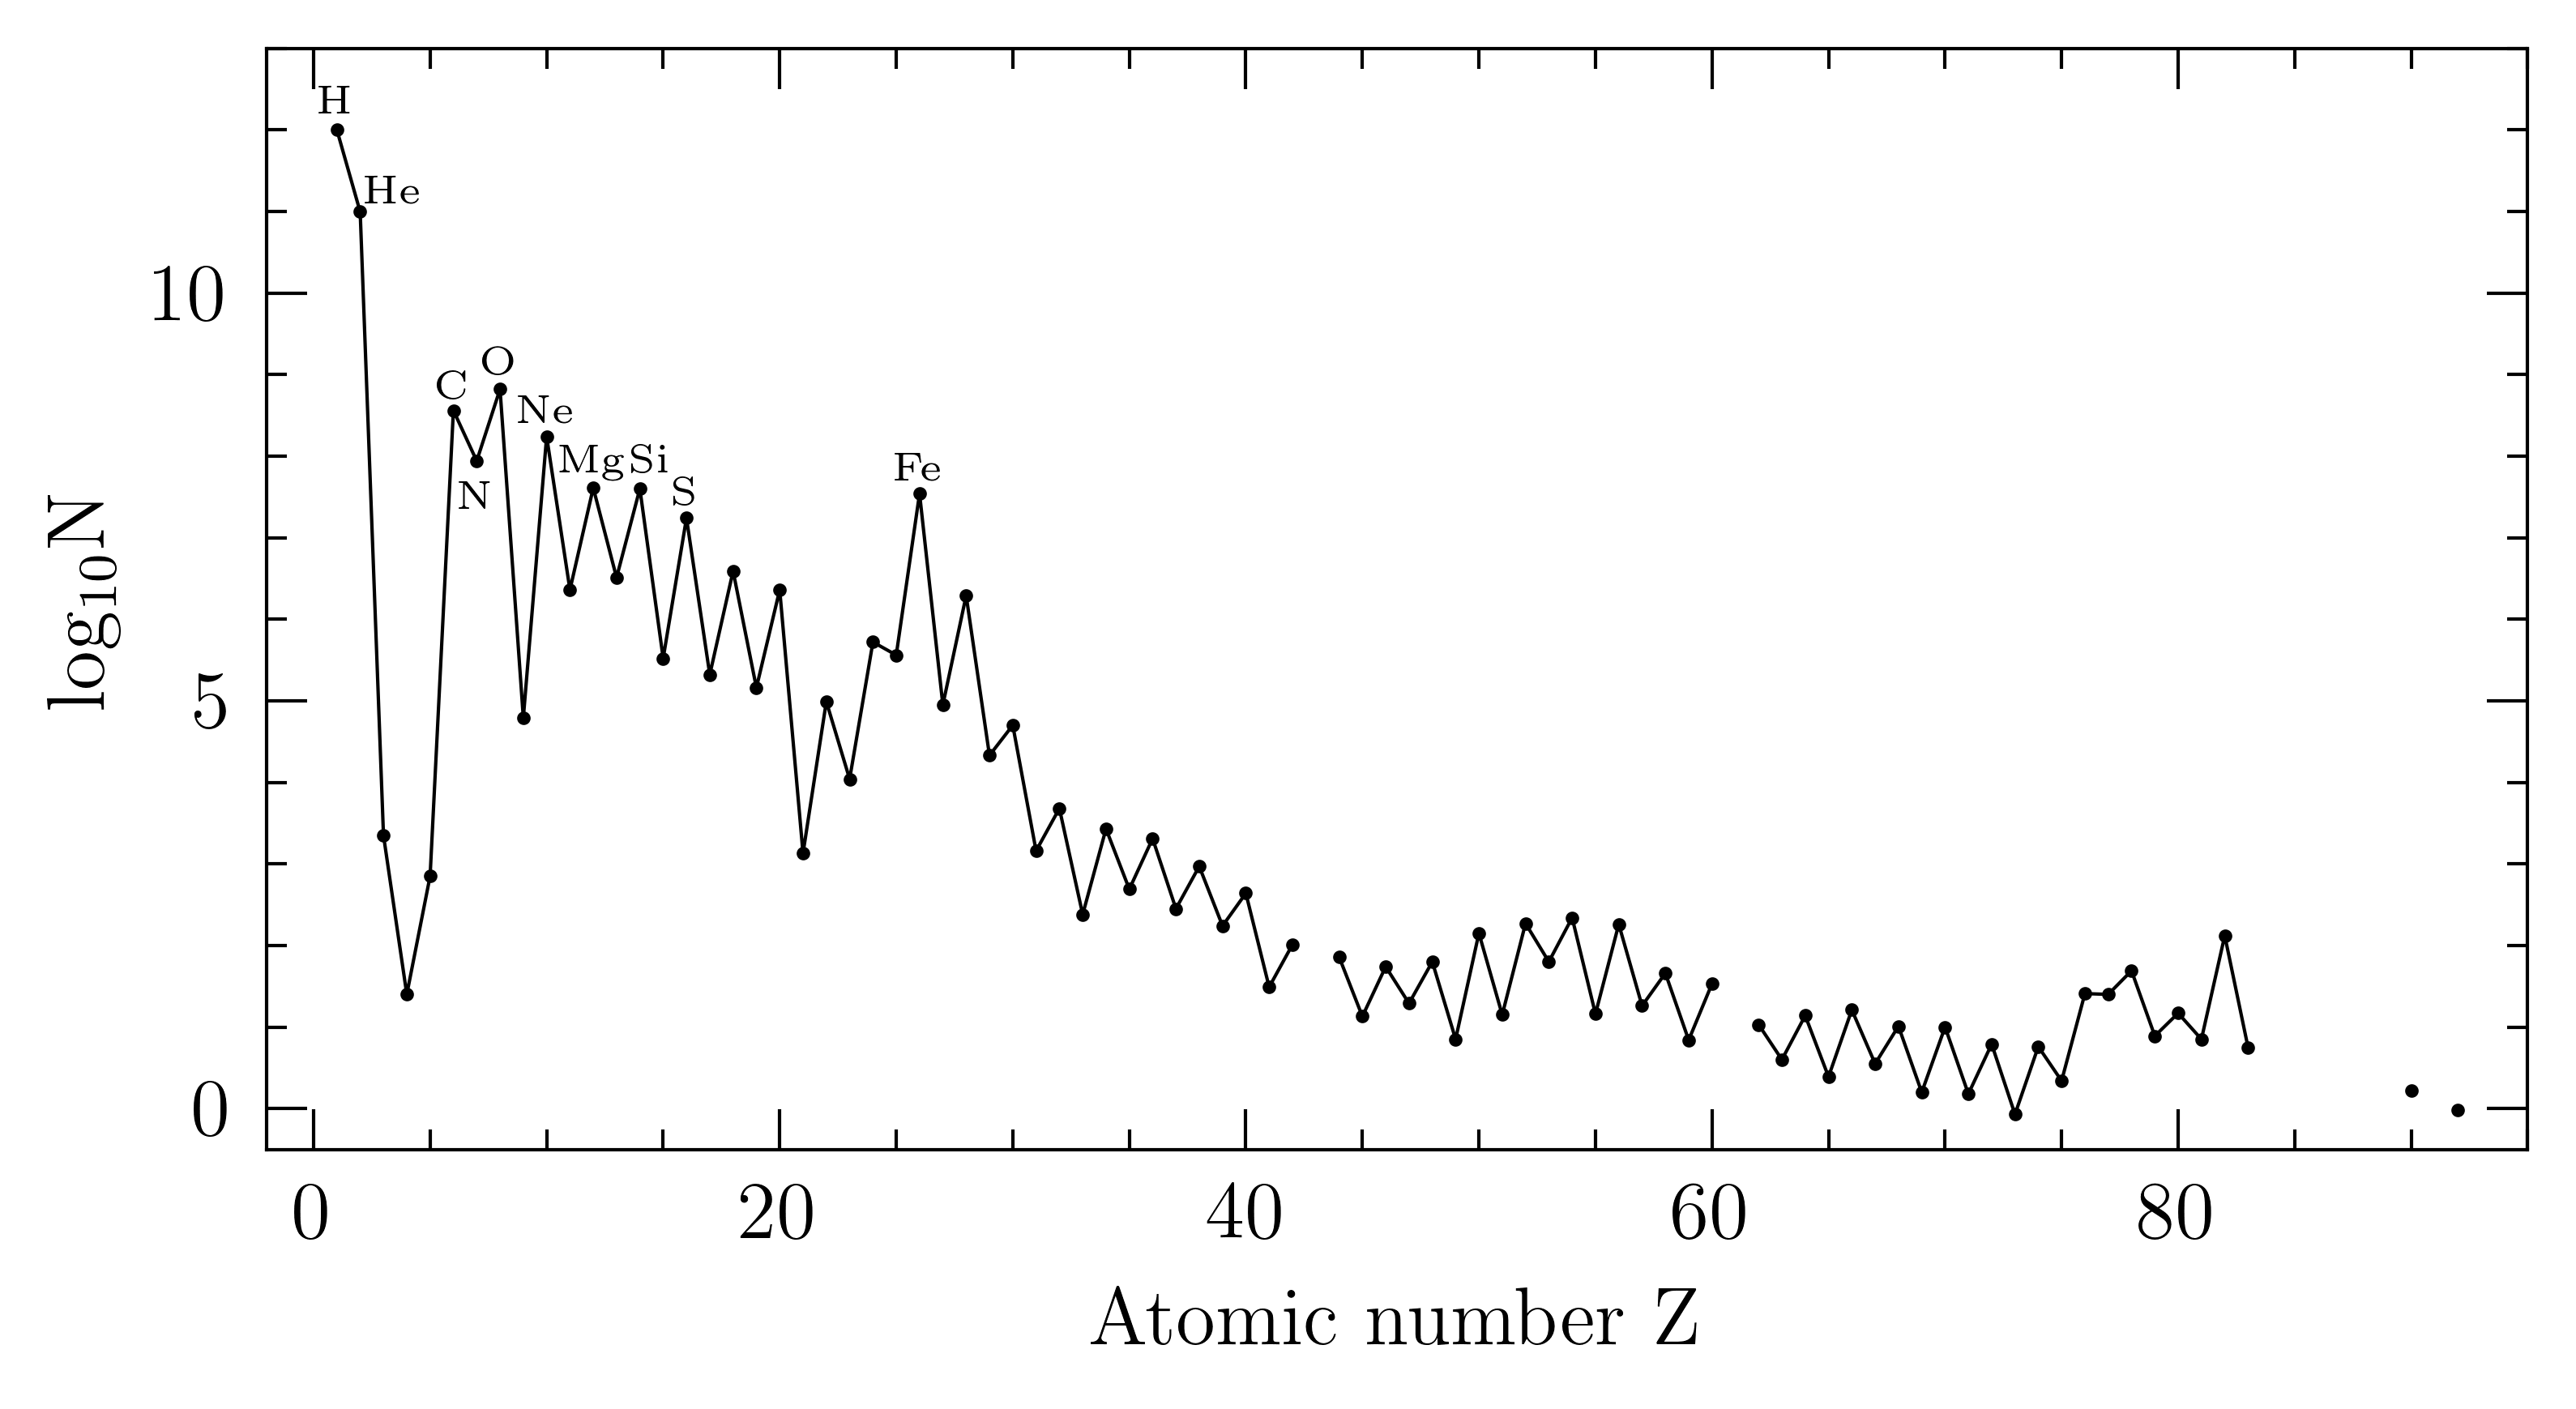

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

zMin = -2
zMax = 95

nMin = -0.5
nMax = 13.0

ax.set_xlim(zMin,zMax)
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_xlabel(r'Atomic number Z',fontsize=axisFontSize)

ax.set_ylim(nMin,nMax)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel(r'log$_{10}$N',fontsize=axisFontSize)

ax.plot(atomic,abund,marker='o',ls='-',color='black',mfc='black',markersize=1,zorder=10,lw=0.5)

# Label the 10 most abundant elements (12+logX/H>7)

ax.text(1,12.1,'H',va='bottom',ha='center',fontsize=6)
ax.text(2.2,11,'He',va='bottom',ha='left',fontsize=6)
ax.text(6,8.6,'C',va='bottom',ha='center',fontsize=6)
ax.text(7,7.7,'N',va='top',ha='center',fontsize=6)
ax.text(8,8.9,'O',va='bottom',ha='center',fontsize=6)
ax.text(10,8.3,'Ne',va='bottom',ha='center',fontsize=6)
ax.text(12,7.7,'Mg',va='bottom',ha='center',fontsize=6)
ax.text(14.5,7.7,'Si',va='bottom',ha='center',fontsize=6) # nudge right because of Mg
ax.text(16,7.3,'S',va='bottom',ha='center',fontsize=6)
ax.text(26,7.6,'Fe',va='bottom',ha='center',fontsize=6)

# Make the plot

ax.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')